# Procesamiento de imágenes #04
### Transformaciones de intensidad

Dra. C. Miriela Escobedo Nicot

El término dominio espacial se refiere a la imagen plana en sí, y los métodos de esta categoría se basan en la manipulación directa de los píxeles de la image. En esta clase centraremos la atención en dos categorías importantes de procesamiento en el dominio espacial:
* Las transformaciones de intensidad (o escala de grises)
* Filtrado espacial

### Técnicas sobre el dominio espacial

Las técnicas del dominio espacial operan directamente sobre los píxeles de una imagen.
El procesamiento sobre el dominio espacial discutido en esta clase adopta la forma general.

$$g(x,y)=T[f(x,y)]$$

donde $f(x,y)$ es la imagen de entrada y $g(x,y)$ es la imagen de salida (procesada) y $T$ es un operador aplicado sobre $f$, definido sobre un entorno de puntos $(x,y)$.

Sin embargo, $T$ puede operar sobre un conjunto de imágenes, como por ejemplo la realización de la adición de $k$ imágenes para reducción de ruido.

### Operaciones con imágenes
* <b>Operaciones puntuales</b>: cada pixel de salida solo depende del correspondiente pixel de entrada.

![](images/18.png)

* <b>Operaciones de vecindad (o entorno local)</b>: el valor de salida depende de un entono cuadrado centrado en cada punto $(x, y)$ de la imagen de entrada.

### Operaciones en un entorno local
El centro de la región se mueve de pixel a pixel empezando, por ejemplo, en la esquina superior izquierda y, a medida que avanza, abarca distintos entornos.

El operador $T$ se aplica en cada ubicación $(x,y)$ para dar la salida, $g$, en cada localización. Solo los píxeles situados dentro del entorno (prefijado) se utilizan en el cálculo del valor de $g$ en $(x,y)$.

Su implementación computacional requiere que se preste cuidadosa atención a las clases de datos y rangos de valores.

Hay técnicas que utilizan entornos adaptativos, en cada punto se contruye un entorno, en el que se aplica el operador, que se adapta a la forma de la imagen o al operador que estamos utilizando.

### Histograma de una imagen

Una de las primeras herramientas que proporcionan información sobre las intensidades de una imagen (o colores) es el histograma.

#### Histograma
El histograma es una representación de la frecuencia relativa de cada color de una imagen.

Mide la frecuencia de ocurrencia (aparición) de cada nivel de gris de la imagen. Se corresponde con la función de distribución de niveles de intensidad.

#### $h(n_k) =$ <b>número de píxeles con nivel</b> $n_k$

* <b>Histograma relativo o normalizado</b>: Sus valores están entre 0, 1, con suma 1, pueden interpretarse como probabilidades de ocurrencia de cada nivel $n_k$

### Obtener histograma de una imagen

Para obtener el histograma de una imagen utilizaremos la función `histogram` que se encuentra en el módulo `exposure` de la biblioteca `skimage`

In [1]:
# Importamos la función con un nombre más corto
from skimage.exposure import histogram as imhist

A esta función le pasamos como parámetro la imagen a para la que deseamos calcular el histograma, y nos retornará dos valores, en el primero se encuentran los valores del histograma, y en el segundo se encuentra lo que llamamos bins o simplemente la longitud de las barras para facilitar el proceso de graficar el histograma.

Para simplificar el proceso trabajaremos por ahora solamente con imágenes en escala de grises.

Comencemos por cargar una imagen

In [2]:
from pylab import * # Primero cargamos nuestrar funciones báscias

In [3]:
lena = imread('dataset/lena_gray_256.tif') # Cargamos la imagen

In [4]:
hist, bin_centers = imhist(lena) # Obtener histograma y sus bins

Ahora procederemos a mostrar la imagen y graficar el histograma obtenido

Text(0, 0.5, '# pixeles')

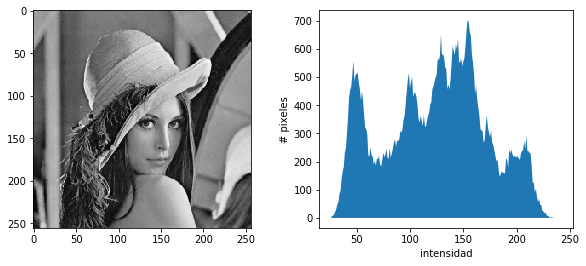

In [5]:
# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(lena, cmap="gray")

# Mostar histograma en el segundo lienzo
ax_hist.fill_between(bin_centers, hist)
ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')

Para graficar el histograma hemos utilizado la función `fill_between` que se encarga de rellenar un área bajo una curva dados sus valore en $(x,y)$. También pudimos haber utilizado la función `plot` que solo se encarga de dibujar la curva sin rellenado.

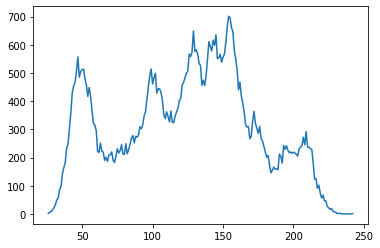

In [6]:
plot(bin_centers, hist)

##### Obtener histograma de una imagen a color

Hemos visto como obtener el histograma de una imagen en escala de grises, pero si deseasemos obtener el histograma de una imagen a color, recordemos que las imágenes a color poseen tres matrices para representar los canales de RGB. Lo que podriamos hacer sería extraer esos canales y obtener el histograma de cada uno de manera independiente.

In [7]:
# Obtendremos la imagen del dataset de skimage
from skimage.data import chelsea # Un gato (o gata)

In [8]:
cat = chelsea()

In [9]:
# Extraer canales de la imagen
R = cat[...,0] # Red
G = cat[...,1] # Green
B = cat[...,2] # Blue

In [10]:
# Hallar histograma para cada uno
hist_R, bin_centers_R = imhist(R)
hist_G, bin_centers_G = imhist(G)
hist_B, bin_centers_B = imhist(B)

Text(0, 0.5, '# pixeles')

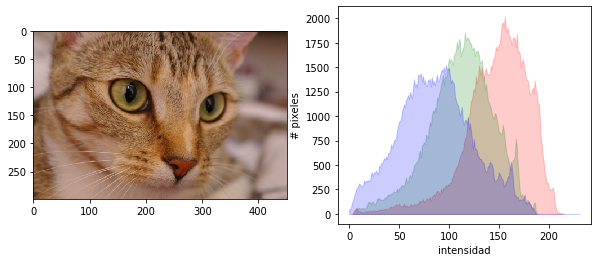

In [11]:
# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(cat, cmap="gray")

# Mostar histograma en el segundo lienzo
# alpha para habiltar transparencia
# color para especificar el color
ax_hist.fill_between(bin_centers_R, hist_R, alpha=0.2, color="red")
ax_hist.fill_between(bin_centers_G, hist_G, alpha=0.2, color="green")
ax_hist.fill_between(bin_centers_B, hist_B, alpha=0.2, color="blue")

ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')

De la misma forma en que hallamos el histograma de una imagen a color (RGB) podemos aplicar técnicas de procesamiento de imágenes en escala de grises sobre imágenes en RGB, trabajando con cada una de sus componentes por separado.

### Transformaciones de la intensidad
Son funciones que actúan sobre un único pixel de la imagen modificando su valor de intensidad. También llamadas de modificación de contraste.

Debido a que solo depende de los valores de intensidad, y no explícitamente de $(x,y)$, las funciones de transformación de intensidad se escriben frecuentemente de forma simplificada como.

### $$s = T(r)$$

done $r$ denota la intensidad de $f$ y $s$ la intensidad de $g$, en cualquier punto $(x,y)$ de las imágenes.

Aplica los valores de intensidad de cada pixel a otros valores de acuerdo a cierta función de transformación.

* Transformaciones lineales: Pone el valor mínimo (min) a 0 y el máximos (max) a 255. Las intensidades se espacian de acuerdo a cierto factor. El factor para este aumento lineas de contraste es:

![](images/19.png)

* Transformaciones no lineales: Funciones monótonas de forma que mantienen la estructura básica de la imagen.

![](images/20.png)

##### Implementación de la función `imadjust` utilizada en MATLAB

La función `imadjust` es utilizada en <b>MATLAB</b> para realizar transformaciones de intensidad de imágenes en niveles de gris. En nuestro caso Python no posee una función similar pero podemos implementar si contamos con su fórmula.

<b>Sintaxis de la función</b>:

```python
g = imadjust(f, (low_in, high_in), (low_out, high_out), gamma)
```

#### $${g} = {{({{f - low\_in}\over{high\_in - low\_in}})^{gamma}}*{(high\_out-low\_out)}}+low\_out$$

Si `high_out` es menor que `low_out` se invertirá la intensidad de salida, generando una imagen similar al negativo de una fotografía. El parámetro `gamma` controla la forma de la curva que se aplica para cambiar los valores de la intensidad en la imagen de salida. Si gamma se omite toma valor 1 (aplicación lineal).

![](images/21.png)

Sino se especifican los intervalos se toma por defecto (0, 1)

In [12]:
### Implementación de imadjust

def imadjust(F,range_in=(0,1),range_out=(0,1),gamma=1):
    G = (((F - range_in[0]) / (range_in[1] - range_in[0])) ** gamma) * (range_out[1] - range_out[0]) + range_out[0]
    return G

##### Probando nuestra función imadjust

In [13]:
from skimage.data import camera # cargar una imagen del dataset de skimage

In [14]:
original = camera() # Imagen original

In [15]:
negativo = imadjust(original, (0, 1), (1, 0)) # Negativo de la imagen

In [16]:
brillo_up = imadjust(original, gamma=0.3) # Aumentar brillo
brillo_down = imadjust(original, gamma=1.7) # Disminuir

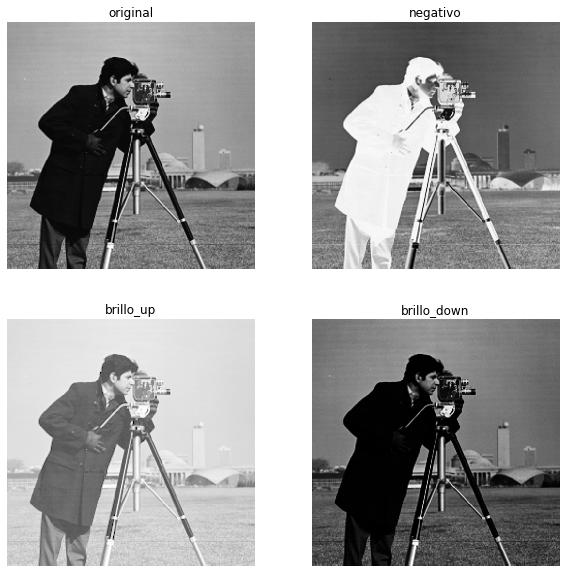

In [17]:
# Mostrar imágenes
_, ((ax0, ax1), (ax2, ax3)) = subplots(2, 2, figsize=(10, 10))

ax0.imshow(original, cmap="gray")
ax0.set_title("original")
ax0.set_axis_off()

ax1.imshow(negativo, cmap="gray")
ax1.set_title("negativo")
ax1.set_axis_off()

ax2.imshow(brillo_up, cmap="gray")
ax2.set_title("brillo_up")
ax2.set_axis_off()

ax3.imshow(brillo_down, cmap="gray")
ax3.set_title("brillo_down")
ax3.set_axis_off()

### Ejercicio independiete #3

Cargar una imagen a color. Transformarla a niveles de gris y aplicarle las funciones de cambio de contraste que aparecen en las figuras. Visualizar en una misma imagen, la imagen original, la imagen transformada y sus histogramas.

### Umbralización o binarización

Transformación no lineal en que la imagen de salida toma tan solo dos valores:

blanco | negro
--|--
0 | 1
False | True

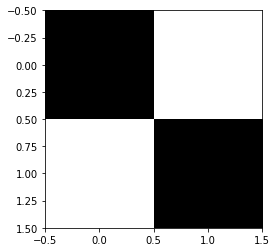

In [18]:
b = array([[True, False], [False, True]])
imshow(b, cmap="binary")

Tiene la forma:

![](images/22.png)

* La binarización permite separar un objeto de interés del resto de la imagen.
* <b>Problema</b>: determinar el valor óptimo para $U$ (umbral)
* <b>Solución</b>: utilizar histogramas.

### Binarización en Python

Binarizar una imagen en Python es muy sencillo, solo debemos comparar la variable que almacena la matriz de la imagen con el umbral deseado, debido a que el operador `*` está sobrecargado para las matrices el valor del umbral será comparado con cada elemento de la matriz y retornará otra matriz con los valores `True` o `False` correspondientes según el resultado obtenido en cada comparación.

Para ver un ejemplo trabajaremos con la imagen de lena que ya hemos cargado anteriormente. 

In [19]:
lena.dtype

dtype('uint8')

In [20]:
print(lena.min(), lena.max())

26 242


Como podemos ver la imagen se encuentra en el rango $0-255$ utilizando el tipo de datos `unit8`, procederemos a escalar sus valores entre $0-1$

In [21]:
lena = lena / 255

In [22]:
lena.dtype

dtype('float64')

In [23]:
print(lena.min(), lena.max())

0.10196078431372549 0.9490196078431372


Ahora pasamos al proceso de umbralización. para este ejemplo escogeremos arbitrario como $0.5$.

In [24]:
U = 0.5 # Umbral
binary_lena = lena < U

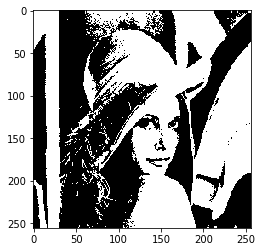

In [25]:
imshow(binary_lena, cmap="binary")

Sin embargo existen métodos para obtener un valor de $U$ óptimo que nos permita binarizar la imágen de manera correcta. Para el proximo ejemplo utilizaremos el método de <b>Otsu</b> para obtener un umbral óptimo.

In [26]:
 # Importamos la función para obtener el umbral por el metodo de Otsu
from skimage.filters import threshold_otsu as otsu

In [27]:
# llamamos a la función pasandole la imagen como parámetro
U = otsu(lena) 
print(U)

0.45765931372549024


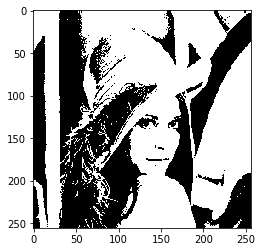

In [28]:
# Binarizamos
binary_lena = lena < U

imshow(binary_lena, cmap="binary")

<b>Nota</b>: Podemos cambiar el sentido del operador de comparación dependiendo de si queremos remarcar una región determinada con color negro o blanco. Si mostramos la imagen utilizando el esquema de color `gray` en lugar de `binary` los valores de color se invierten en la imagen mostrada.

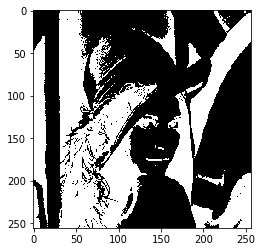

In [29]:
imshow(binary_lena, cmap='gray')

### Procesamiento del histograma

Las funciones que transforman la intensidad basadas en información extraída del histograma de la imagen juegan un papel básico en áreas del procesamiento de imágenes como pueden ser

* Realce
* Compresión
* Segmentación y descripción

#### Ecualización del histograma
* El efecto de ecualizar el histograma de una imagen es producir una distribución uniforme de los niveles de gris. Mejorando el contraste.
* La manipulación del histograma se basa en controlar la función de densidad de probabilidad de los niveles de gris a través de sus función de transformación.

El objetivo es conseguir cun histograma uniforme en la imagen de salida. Con todos los niveles con la misma frecuencia de aparición.

![](images/23.png)
* Es una expansión del histograma para que ocupe el mayor ancho del expectro de tonalidades de grises.
* Amplia el histograma. Mejora el contraste de la imagen.
* Se asume que el nivel de gris $r$ es una función continua y normalizada (entre 0 y 1)

### Equalización del histograma en Python

Para la equalización del histograma de una imagen utilizaremos la función `equalize_hist` que se encuentra en el módulo `exposure`de la biblioteca skimage. Esta función recibe como parámetro una imagen y nos retorna otra imagen con su histograma equalizado. Además podemos pasarle como segundo parámetro el número de niveles de gris especificado para la salida el cuál por defecto es 256.

In [30]:
# Importar función para ecualziar el histograma
from skimage.exposure import equalize_hist as histeq

In [31]:
auto = imread('dataset/auto.tif')

Text(0, 0.5, '# pixeles')

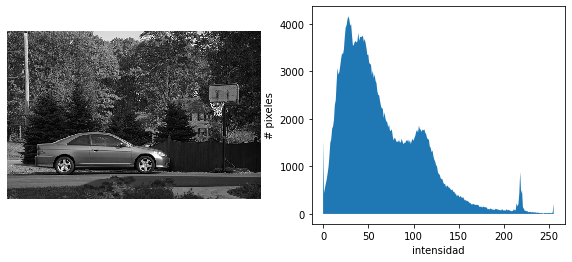

In [32]:
hist1, bin_centers1 = imhist(auto)

# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(auto, cmap="gray")
ax_image.set_axis_off()

# Mostar histograma en el segundo lienzo
ax_hist.fill_between(bin_centers1, hist1)
ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')

Text(0, 0.5, '# pixeles')

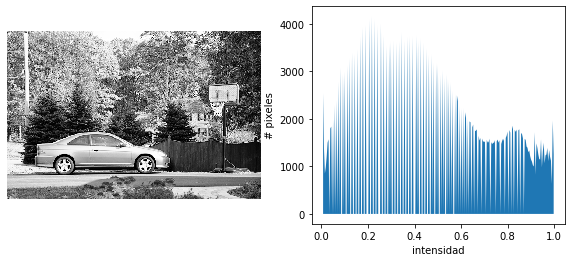

In [33]:
auto2 = histeq(auto) # Equalizar histograma

hist2, bin_centers2 = imhist(auto2)

# Obtener lienzos para la imagen y para el histograma
_, (ax_image, ax_hist) = subplots(1, 2, figsize=(10, 4))

# Mostrar imagen en el primer lienzo
ax_image.imshow(auto2, cmap="gray")
ax_image.set_axis_off()

# Mostar histograma en el segundo lienzo
ax_hist.fill_between(bin_centers2, hist2)
ax_hist.set_xlabel('intensidad')
ax_hist.set_ylabel('# pixeles')